```
Topic:        Challenge Set 6
Subject:      Linear Regression and Learning Curve challenges
Date:         09/17/2018
Name:         Goodwin Chen
```

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Challenge 1

In [17]:
b0 = 15
b1 = 7
epsilon = np.random.randn(1000)

In [41]:
x = np.linspace(.001, 100, 1000)

In [42]:
y = b0 + b1*np.log(x) + epsilon

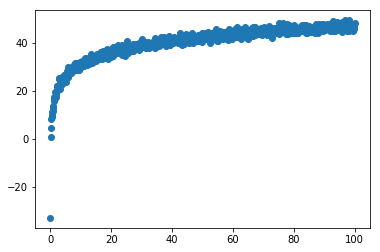

In [43]:
plt.scatter(x,y)

In [44]:
#quadratic model
lm = LinearRegression()
X1 = np.concatenate((x.reshape(-1,1), (x**2).reshape(-1,1)), axis=1)
lm.fit(X1, y)
lm.score(X1, y)

0.8325812736090038

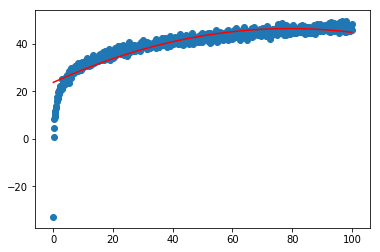

In [46]:
plt.plot(x, lm.predict(X1), c='r')
plt.scatter(x, y)

In [49]:
#log model
lm_log = LinearRegression()
X2 = np.log(x).reshape(-1, 1)
lm_log.fit(X2, y)
lm_log.score(X2, y)

0.9801725318180605

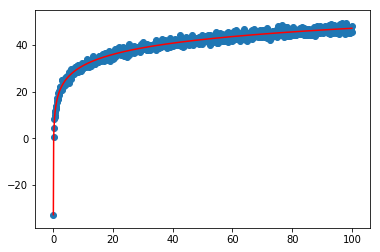

In [50]:
plt.plot(x, lm_log.predict(X2), c='r')
plt.scatter(x, y)

## Challenge 2

In [51]:
x = np.linspace(-100, 100, 1000)
b2 = -3.5
y = b0 + b1*x + b2*x**2 + epsilon

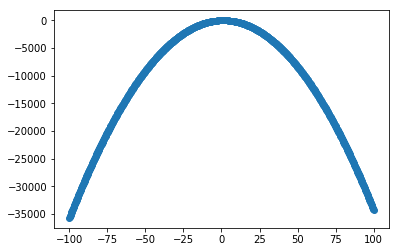

In [52]:
plt.scatter(x, y)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
#quadratic model
lm = LinearRegression()
X1 = np.concatenate((x.reshape(-1,1), (x**2).reshape(-1,1)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X1, y)
lm.fit(X_train, y_train)
print('MSE on training set: {:.3f}'.format(mean_squared_error(y_train, lm.predict(X_train))))
print('MSE on test set: {:.3F}'.format(mean_squared_error(y_test, lm.predict(X_test))))

MSE on training set: 1.041
MSE on test set: 1.098


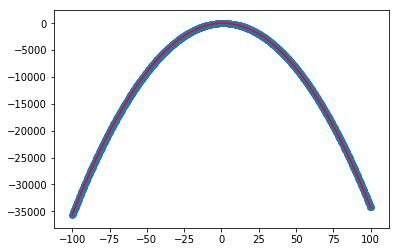

In [70]:
plt.plot(x, lm.predict(X1), c='r')
plt.scatter(x, y)

## Challenge 3

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
def get_aic(est, x, y, k):
    resid = y - est.predict(x)
    sse = np.sum(resid**2)
    return 2*k + 2*np.log(sse)
    

In [79]:
train_err, test_err, r2, aic = [], [], [], []
for i in range(8):
    X = PolynomialFeatures(degree=i).fit_transform(x.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    lm.fit(X_train, y_train)
    train_err.append(mean_squared_error(y_train, lm.predict(X_train)))
    test_err.append(mean_squared_error(y_test, lm.predict(X_test)))
    r2.append(lm.score(X_test, y_test))
    aic.append(get_aic(lm, X_test, y_test, i))

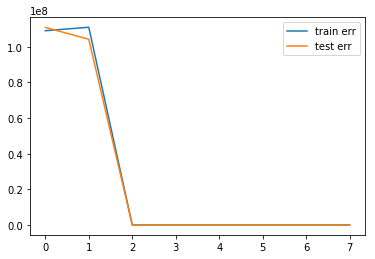

In [91]:
plt.plot(np.arange(8), train_err, label='train err')
plt.plot(np.arange(8), test_err, label = 'test err')
plt.legend()

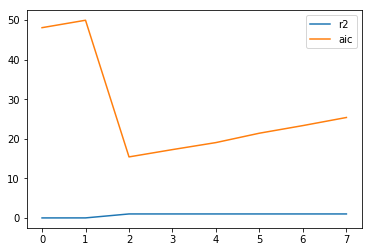

In [93]:
plt.plot(np.arange(8), r2, label='r2')
plt.plot(np.arange(8), aic, label = 'aic')
plt.legend()

## Challenge 4

In [127]:
X1 = np.concatenate((x.reshape(-1,1), (x**2).reshape(-1,1)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X1, y)

train_scores, test_scores = [], []
idx = 5
while idx < len(X_train):
    lm.fit(X_train[:idx], y_train[:idx])
    train_scores.append(lm.score(X_train, y_train))
    test_scores.append(lm.score(X_test, y_test))
    idx += 5

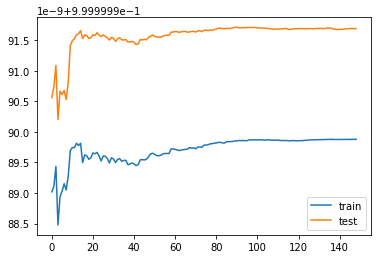

In [128]:
plt.plot(train_scores, label='train')
plt.plot(test_scores, label='test')
plt.legend()
#note the scale of y axis, it's almost a perfect fit from the start
#let's try a linear regression of degree 1

In [132]:
X2 = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X2, y)

train_scores, test_scores = [], []
idx = 5
while idx < len(X_train):
    lm.fit(X_train[:idx], y_train[:idx])
    train_scores.append(lm.score(X_train, y_train))
    test_scores.append(lm.score(X_test, y_test))
    idx += 5

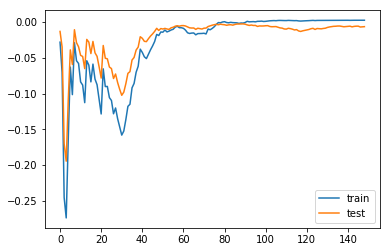

In [133]:
plt.plot(train_scores, label='train')
plt.plot(test_scores, label = 'test')
plt.legend()
#looks like a pretty bad fit